Spherical harmonic transforms are:
$$f_{\ell m } = \int d^2n\: f(\hat n) \:Y^\dagger_{\ell m}$$
For a spherically symmetric function on the curved-sky we have
$$ \kappa_{LM} = \delta_{M 0} \sqrt {\frac{2 L + 1}{4\pi}} 2\pi \int_{-1}^{+1} d\cos \theta\: \kappa(\theta) P_L(\cos\theta) \equiv  \delta_{M 0} \sqrt {\frac{2 L + 1}{4\pi}} \kappa_L.$$
Here $\kappa_L$ is the standard spin-0 Wigner transform of the profile, and there is a prefactor $\sqrt {\frac{2 L + 1}{4\pi}}$ to go to $\kappa_{L0}$.
The $C_L$'s becomes trivially
$$\frac{1}{2L + 1}\sum_M |\kappa_{LM}|^2 = C_L^{\kappa\kappa} \equiv \frac{ \kappa_L^2}{4\pi}$$
We have the asymptotics
$$ d^\ell_{0, 0}(\theta) = P_\ell(\cos \theta) \underbrace{\rightarrow}_{\ell \rightarrow \infty} J_0(\ell \theta) $$
with which we can make the following identifications for isotropic functions between the curved-space harmonics and flat-sky harmonics:
$$\kappa(\theta) = \sum_L \frac{2 L + 1}{4\pi} \kappa_L P_L(\cos \theta) \sim \frac{1}{2\pi }\int_0^\infty d\ell \ell \kappa_\ell J_0(\ell \theta) = \int \frac{d^2\boldsymbol{l}}{(2\pi)^2} \:\kappa_l e^{i \boldsymbol{\ell }\cdot \boldsymbol \theta}$$
This means that the flat-sky and curved harmonics must match provided the flat-sky Fourier convention. Indeed:
$$
\kappa(\ell) = \int d^2 x\: \kappa(x) e^{- i \boldsymbol{\ell}\cdot\boldsymbol{x}} =2\pi \int_0^{\infty} d\theta \: \theta \kappa(\theta) J_0(\theta \ell) \sim 2\pi \int_{-1}^1 d \cos (\theta )\:\kappa(\theta P_\ell(\cos \theta) = \kappa_L 
$$

# template fitting

Say we want the amplitude of a template $\kappa_t$ using a noisy tracer with noise spectrum $N_L$. We have observations $\hat \kappa_LM$ which should fit the template $\kappa_0\kappa^t_{LM}$
Assuming Gaussianity and isotropic noise $\av{\hat \kappa_{L0}\hat \kappa_{L'0}} - \av{\hat \kappa_{L0}}\av{\hat \kappa_{L'0}} = \delta_{LL'} N_L$ we build
$$ \frac{\sum_L  \kappa^t_{L0} \hat \kappa_{L0} N^{-1}_L}{\sum_L  \kappa^t_{L0} \hat \kappa^t_{L0} N^{-1}_L} $$
The Fisher error is the denominator
$$
\frac{1}{\sigma^2} = \sum_L  \frac{ |\kappa^t_{L0}|^2 }{N_L}= \sum_L  \left(\frac{2L + 1}{4\pi} \right)\frac{ |\kappa^t_L|^2 }{N_L} \textrm{ which in flat sky gives }\sim  \frac 1 {2\pi} \int dl \: l  \frac{ |\kappa^t_l|^2 }{N_l} =\int \frac{d^2l}{(2\pi)^2} \: \frac{ |\kappa^t_l|^2 }{N_l}
$$
with the conventions above (with these conventions, note the $4\pi$ (sphere area) in $\textrm{Var}(\kappa_t) = 4\pi N_L$

In Zubeldia & Challinor $\kappa_t$ is unity at the scale radius angle. 

In [1]:
%load_ext autoreload
%autoreload 2
import pylab as pl
import numpy as np 
import camb 

import lensit as li
from lensit.clusterlens import lensingmap

from lensit.misc.misc_utils import gauss_beam
from lensit.ffs_covs import ffs_cov, ell_mat

import os
import os.path as op
import matplotlib as mpl
from matplotlib import pyplot as plt

from scipy.interpolate import UnivariateSpline as spline




In [2]:
# We start by intiating CAMB which will give us the relevant cosmology 
cambinifile = 'planck_2018_acc'
pars = camb.read_ini(op.join(op.dirname(camb.__path__[0]),  'inifiles', cambinifile + '.ini'))
results = camb.get_results(pars)


thmax in amin, thscale 2.139100514187885 0.6846534736764758


/Users/jcarron/Library/CloudStorage/OneDrive-unige.ch/LensIt/lensit/clusterlens/profile.py:178: RuntimeWarning: invalid value encountered in subtract
  Cidiff = Cixpc - Cix
/Users/jcarron/Library/CloudStorage/OneDrive-unige.ch/LensIt/lensit/clusterlens/profile.py:179: RuntimeWarning: invalid value encountered in true_divide
  u0 = np.sin(x) * Sidiff + np.cos(x) * Cidiff - np.sin(x * c) / (x * (1. + c))


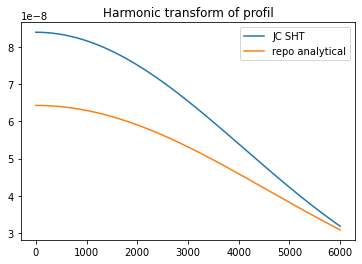

In [6]:
from lensit.clusterlens import profile
from plancklens.wigners import wigners
hprofile = profile.profile(results)

# x = r / rs
M200, z = 2 * 1e14, 0.7
xmax = hprofile.get_concentration(M200, z) # truncating at virial radius seems like at reasonable thing
lmax = 6000
thtmax = hprofile.x_to_theta_amin(M200, z, xmax)
thtscale = hprofile.x_to_theta_amin(M200, z, 1.)

print('thmax in amin, thscale', thtmax, thtscale)
xg, wg = wigners.get_xgwg(np.cos(thtmax / 180 / 60 * np.pi),1., max(5000, int(lmax * thtmax / (360 * 60))))
kappa = hprofile.kappa_theta(M200, 1., np.arccos(xg) / np.pi * 180 * 60 )
kappa_l = wigners.wignercoeff(kappa * wg, xg, 0, 0, lmax) 
kappa_0 = hprofile.kappa_theta(M200, z, thtscale *(1.001) )[0]
ft_analytical = hprofile.analitic_kappa_ft(M200,z, np.arange(lmax + 1))
pl.title('Harmonic transform of profil')
pl.plot(kappa_l, label='JC SHT')
pl.plot(ft_analytical, label='repo analytical')
pl.legend()

 [00:00:38]  ---------> 90%


(0.0004, 0.1)

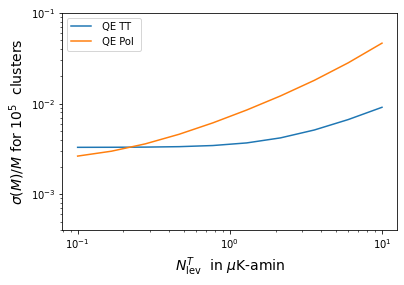

In [4]:
import plancklens
import healpy as hp
from plancklens import qresp
from plancklens import utils
from plancklens.utils import cli
cls_path = os.path.join(os.path.dirname(os.path.abspath(plancklens.__file__)), 'data', 'cls')
cls_len = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lensedCls.dat'))
cls_unl = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))

cls_weight = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lensedCls.dat'))
k, ksource = 'ptt', 'p'

lmin_ivf, lmax_ivf, lmax_qlm = 100, 5000, lmax
transf = hp.gauss_beam(1. / 180 / 60 * np.pi, lmax=lmax_ivf)
nlevts = np.logspace(-1, 1, 10)
sigma = {'ptt':np.zeros(nlevts.size), 'p_p':np.zeros(nlevts.size)}
kSZ_Dl = 2.9 # uK^2
wCkk = True
kSZ_Cl = kSZ_Dl * utils.cli(np.arange(lmax_ivf + 1) * np.arange(1, lmax_ivf + 2) / 2 / np.pi)
for i, nlevt in utils.enumerate_progress(nlevts):
    fals = {'tt': cli(cls_len['tt'][:lmax_ivf + 1] + (nlevt / 180 / 60 * np.pi) ** 2 / transf ** 2) + kSZ_Cl / transf ** 2}
    fals['tt'][:lmin_ivf] *= 0.
    fals['ee'] = cli(cls_len['ee'][:lmax_ivf + 1] + (nlevt * np.sqrt(2.) / 180 / 60 * np.pi) ** 2 / transf ** 2)
    fals['ee'][:lmin_ivf] *= 0.
    fals['bb'] = cli(cls_len['bb'][:lmax_ivf + 1] + (nlevt * np.sqrt(2.) / 180 / 60 * np.pi) ** 2 / transf ** 2)
    fals['bb'][:lmin_ivf] *= 0.
    for k in ['ptt', 'p_p']:
        N0_pp = utils.cli(qresp.get_response(k, lmax_ivf, ksource, cls_weight, cls_len, fals, lmax_qlm=lmax_qlm)[0])
        N0_pp += wCkk * cls_unl['pp'][:lmax_qlm+1]
        N0_kk = N0_pp * np.arange(lmax_qlm + 1, dtype=float) ** 2 * np.arange(1, lmax_qlm + 2, dtype=float) ** 2 * 0.25
        ls = np.arange(1, lmax_qlm + 1)
        F_intg =  (2 * ls  + 1) * (kappa_l[ls] / kappa_0) ** 2 / N0_kk[ls] / (4 * np.pi)
        sigma[k][i] = np.sqrt(1./np.sum(F_intg)) / kappa_0

pl.loglog(nlevts, sigma['ptt']/np.sqrt(10 ** 5), label=  ' QE TT ')
pl.loglog(nlevts, sigma['p_p']/np.sqrt(10 ** 5), label=  ' QE Pol ')

pl.legend()
pl.xlabel(r'$N_{\rm lev}^T$  in $\mu$K-amin', fontsize=14)
pl.ylabel('$\sigma(M) / M$ for $10^5$  clusters', fontsize=14)
pl.ylim(4e-4, 1e-1)